# Lab 1 - Attributes and Visualization

Team: Frank Sclafani, Jan Shook, and Leticia Valadez

## About this Notebook

This Jupyter (v4.3.0) notebook was developed on Windows 10 Pro (64 bit) using Anaconda v4.4.7 and Python v3.*.

Packages associated with Anaconda were extracted as follows:

> conda install -c anaconda pandas

> conda install -c anaconda numpy 

In addition to the packages in Anaconda (and outside of the Anaconda ecosystem), this notebook uses Plotly (v2.2.3) for visualization. The zip file for Plotly can be found on GitHub at (https://github.com/plotly/plotly.py). You can install the Plotly packages as follows:

> pip install plotly

> pip install cufflinks

The version of Pandas and its dependencies are shown below.

Runtime Expectation: On the first execution of this notebook, this cell may take 30 seconds or so to execute. After the first execution, this cell will run in just a few seconds.

## TV News Channel Commercial Detection

Our team selected this dataset for two reasons: 1) It has a large number of instances (129,685, which is greater than the requirement of at least 30,000) and enough attributes (14, which is greater than the requirement of at least 10), and 2) It looks like an interesting dataset (detecting commercials). Initial questions of interest are how do you detect commercials from this data? Can a model be trained to detect and skip (or remove) commercials? If so, would this solution be robust enough for commercial products like TiVo?

This dataset is from the UCI Machine Learning website (https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset). It consists of popular audio-visual features of video shots extracted from 150 hours of TV news broadcast of 3 Indian and 2 international news channels (30 Hours each). In the readme accompanying the data, the authors describe the potential benefits of this data as follows:

> Automatic identification of commercial blocks in news videos finds a lot of applications in the domain of television broadcast analysis and monitoring. Commercials occupy almost 40-60% of total air time. Manual segmentation of commercials from thousands of TV news channels is time consuming, and economically infeasible hence prompts the need for machine learning based Method. Classifying TV News commercials is a semantic video classification problem. TV News commercials on particular news channel are combinations of video shots uniquely characterized by audio-visual presentation. Hence various audio visual features extracted from video shots are widely used for TV commercial classification. Indian News channels do not follow any particular news presentation format, have large variability and dynamic nature presenting a challenging machine learning problem. Features from 150 Hours of broadcast news videos from 5 different (3 Indian and 2 International News channels) news channels. Viz. CNNIBN, NDTV 24X7, TIMESNOW, BBC and CNN are presented in this dataset. Videos are recorded at resolution of 720 X 576 at 25 fps using a DVR and set top box. 3 Indian channels are recorded concurrently while 2 International are recorded together. Feature file preserves the order of occurrence of shots.

### Objective: Classify Video Attributes as Commercial or Non-commercial

This dataset has already been classified as commercial (+1) or non-commercial (-1) in the Dimension Index attribute. Hence, in subsequent analysis, we will be able to train and compare our data models against the target variable that has already created to determine the effectiveness of the model.

### Techniques Applied in this Project

#### Data Preparation

> The SVM Light approach to persisting sparse matrix arrays was used loaded into a Pandas dataframe

> The X and Y axis in the SVM Light approach was combined into a two-dimensional Pandas dataframe

> Columns that have little merit to the intial analysis were deleted

> Pandas columns with empty values (i.e., all zeroes) were deleted

> Different type of row and / or columns were separated into different dataframes to analyize the data differently

#### Data Visualization

> The Hexagon Bin Plot was used to visualize the complete dataset, and it appears a linear coorelation exists among attributes

> Individual scatter plots were created for each attribute (non-bin related)

### Other features 

* <span style="color:red"> Other features that could be added to the data set are other broadcasts from countries beside India.  In addition, enumerating the features </span>
* <span style="color:red"> Also, another attribute that could be beneficial is the volume of the audio (commercials tend to be louder in volume than the show). </span>




In [1]:
import pandas as pd
import numpy as np

%time pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.3
pytest: 3.2.1
pip: 9.0.1
setuptools: 36.5.0.post20170921
Cython: 0.26.1
numpy: 1.13.3
scipy: 0.19.1
xarray: None
IPython: 6.1.0
sphinx: 1.6.3
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.2
feather: None
matplotlib: 2.1.0
openpyxl: 2.4.8
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.0
bs4: 4.6.0
html5lib: 0.999999999
sqlalchemy: 1.1.13
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: None
Wall time: 971 ms


# Data Understanding




## About this Dataset (Summary)

This project is comprised of five datasets (bbc.txt, cnn.txt, cnnibn.txt, ndtv.txt, and timesnow.txt), all found at the UCI Machine Learning webset at https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset. Combined, these five datasets have 129,685 instances (rows) and 14 attributes. As shown in the example record below, most of these attributes have multiple data points (often hundreds) and almost all of these values are floating point.

> 1  1:123 2:1.316440 3:1.516003 4:5.605905 5:5.346760 6:0.013233 7:0.010729 8:0.091743 9:0.050768 10:3808.067871 11:702.992493 12:7533.133301 13:1390.499268 14:971.098511 15:1894.978027 16:114.965019 17:45.018257 18:0.635224 19:0.095226 20:0.063398 21:0.061210 22:0.038319 23:0.018285 24:0.011113 25:0.007736 26:0.004864 27:0.004220 28:0.003273 29:0.002699 30:0.002553 31:0.002323 32:0.002108 33:0.002036 34:0.001792 35:0.001553 36:0.001250 37:0.001317 38:0.001084 39:0.000818 40:0.000624 41:0.000586 42:0.000529 43:0.000426 44:0.000359 45:0.000446 46:0.000268 47:0.000221 48:0.000154 49:0.000217 50:0.000193 51:0.000163 52:0.000165 53:0.000210 54:0.000114 55:0.000130 56:0.000055 57:0.000013 58:0.733037 59:0.133122 60:0.041263 61:0.019699 62:0.010962 63:0.006927 64:0.004525 65:0.003128 66:0.002314 67:0.001762 68:0.001361 69:0.001065 70:0.000914 71:0.000777 72:0.000667 73:0.000565 74:0.000520 75:0.000467 76:0.000469 77:0.000486 78:0.000417 79:0.000427 80:0.000349 81:0.000258 82:0.000262 83:0.000344 84:0.000168 85:0.000163 86:0.001058 90:0.020584 91:0.185038 92:0.148316 93:0.047098 94:0.169797 95:0.061318 96:0.002200 97:0.010440 98:0.004463 100:0.010558 101:0.002067 102:0.338970 103:0.470364 104:0.189997 105:0.018296 106:0.126517 107:0.047620 108:0.045863 109:0.184865 110:0.095976 111:0.015295 112:0.056323 113:0.024587 115:0.037647 116:0.006015 117:0.160327 118:0.251688 119:0.176144 123:0.006356 219:0.002119 276:0.002119 296:0.341102 448:0.099576 491:0.069915 572:0.141949 573:0.103814 601:0.002119 623:0.050847 726:0.038136 762:0.036017 816:0.036017 871:0.016949 924:0.008475 959:0.036017 1002:0.006356 1016:0.008475 1048:0.002119 4124:0.422333825949 4125:0.663917631952

All five datasets are formated in the svmlight / libsvm format. This format is a text-based format, with one sample per line. It is a light format meaning it does not store zero valued features, every fetature that is "missing" has a value of zero. The first element of each line is used to store a target variable, and in this case it is the vaue of the atriburtes below. 

Hence, the file simply contains more records like the one shown above. While there are only 14 attributes in each dataset, most attributes can have more than one column of data. 

## Description of Attributes

The following sections describe this dataset using the Readme.txt file, examination of the data, and definition of the terms.

### Attribute Descriptions

### Dimension Index (Dependent Variable)

This is the dependent variable of Commercial (+1) or Non-Commercial (-1) (i.e., the classification).

### Shot Length

Commercial video shots are usually short in length, fast visual transitions with peculiar placement of overlaid text bands. Video Shot Length is directly used as one of the feature.

### Short time energy

Short term energy (STE) can be used for voiced, unvoiced and silence classification of speech. The relation for finding the short term energy can be derived from the total energy relation defined in signal processing. STE is defined as sum of squares of samples in an audio frame. To attract user’s attention commercials generally have higher audio amplitude leading to higher STE.

### ZCR
Zero Crossing Rate (ZCR) is the rate of sign-changes along a signal. This is used in both speech recognition and music information retrieval and it is a feature used to classify sounds. That is precisely its use here in this dataset, it will be used as one of the attributes to help differentiate commercials from the news program. The Zero Crossing Rate measures how rapidly an audio signal changes. ZCR varies significantly for non-pure speech (High ZCR), music (Moderate ZCR) and speech (Low ZCR). Usually commercials have background music along with speech and hence the use of ZCR as a feature. Audio signals associated with commercials generally have high music content and faster rate of signal change compared to that of non-commercials.

### Spectral Centroid

Spectral Centroid is a measure of the “center of gravity” using the Fourier transform's frequency and magnitude information. It is commonly used in digital signal processing to help characterize a spectrum. This motivated the use of spectral features where higher Spectral Centroid signify higher frequencies (music).

### Spectral Roll off

Spectral Roll off Point is a measure of the amount of the right-skewedness of the power spectrum. This feature discriminates between speech, music and non-pure speech.

### Spectral Flux

Spectral flux is a measure of how quickly the power spectrum of a signal changes. It is calculated by comparing the power spectrum for one frame against the power spectrum from the previous frame.

### Fundamental Frequency

The fundamental frequency is the lowest frequency of a waveform. In music, the fundamental is the musical pitch of a note that is perceived as the lowest fundamental frequency present. This feature is also used as non-commercials (dominated by pure speech) will produce lower fundamental frequencies compared to that of commercials (dominated by music).

### Motion Distribution

Motion Distribution is obtained by first computing dense optical flow (Horn-Schunk formulation) followed by construction of a distribution of flow magnitudes over the entire shot with 40 uniformly divided bins in range of [0, 40]. Motion Distribution is a significant feature as many previous works have indicated that commercial shots mostly have high motion content as they try to convey maximum information in minimum possible time.

### Frame Difference Distribution

The Frame Difference Distribution is the measure of the difference between the current frame and a reference frame, often called "background image", or "background model". This will assist in measuring the perceived speed at which the frames appear to differentiate. Sudden changes in pixel intensities are grasped by Frame Difference Distribution. Such changes are not registered by optical flow. Thus, Frame Difference Distribution is also computed along with flow magnitude distributions. The researchers obtain the frame difference by averaging absolute frame difference in each of 3 color channels and the distribution is constructed with 32 bins in the range of [0, 255].

### Text area distribution

The text area distribution is like the text area distribution in that is the measure of the difference between the current text on screen and a reference amount of text. The text distribution feature is obtained by averaging the fraction of text area present in a grid block over all frames of the shot.
Bag of Audio Words
This attribute is to be removed to reduce the sparseness of the data set.

###  Edge change Ratio

Edge Change Ratio Captures the motion of edges between consecutive frames and is defined as ratio of displaced edge pixels to the total number of edge pixels in a frame. The researchers calculated the mean and variance of the ECR over the entire shot.

## Columns and Data Types

The table below shows the attributes and their data types in tabular format for quick review.

In [2]:
# We are using a Pandas dataframe to tabulate the data (and provide an simple introduction into Pandas)

#Dimension Index  ... first column

df_attributes = pd.DataFrame(
  data=[
    ('Dimension Index','0','integer',''),
    ('Shot Length','1','integer',''),
    ('Motion Distribution','2-3','float','Mean and Variance'),
    ('Frame Difference Distribution','4-5','float','Mean and Variance'),
    ('Short time energy','6-7','float','Mean and Variance'),
    ('ZCR','8-9','float','Mean and Variance'),
    ('Spectral Centroid','10-11','float','Mean and Variance'),
    ('Spectral Roll off','12-13','float','Mean and Variance'),
    ('Spectral Flux','14-15','float','Mean and Variance'),
    ('Fundamental Frequency','16-17','float','Mean and Variance'),
    ('Motion Distribution','18-58','float','40 bins'),
    ('Frame Difference Distribution','59-91','float','32 bins'),
    ('Text area distribution','92-122','float','15 bins Mean and 15 bins for variance'),
    ('Bag of Audio Words','123-4123','float','4,000 bins'), 
    ('Edge change Ratio','4124-4125','float','Mean and Variance')
  ],
  columns=[
    'Attribute Name','Columns','Data Types','Notes'
  ],
  index=[
    'Attribute 00', 'Attribute 01', 'Attribute 02', 'Attribute 03', 'Attribute 04', 'Attribute 05', 'Attribute 06',
    'Attribute 07', 'Attribute 08', 'Attribute 09', 'Attribute 10', 'Attribute 11', 'Attribute 12', 'Attribute 13',
    'Attribute 14'
  ]
)

# we will later omit the Bag of Audio Words attribute,"123-4123" to reduce the sparcity of the data.
# tabulate is used to left justify these string value columns (versus the right-justified default)

#from tabulate import tabulate

#print(tabulate(df_attributes, showindex=True, headers=df_attributes.columns))

### Features

# Data Preparation

This section covers the activities needed to construct the dataset that will be fed into the models. The files for this project  (bbc.txt, cnn.txt, cnnibn.txt, ndtv.txt, and timesnow.txt) can be found at  https://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset as a single ZIP file. To eliminate  manual work and streamline file processing, these five files were extracted and put on a team member's website (http://www.shookfamily.org) as follows:

http://www.shookfamily.org/data/BBC.txt (17,720 lines)

http://www.shookfamily.org/data/CNN.txt (22,545 lines)

http://www.shookfamily.org/data/CNNIBN.txt (33,117 lines)

http://www.shookfamily.org/data/NDTV.txt (17,051 lines)

http://www.shookfamily.org/data/TIMESNOW.txt (39,252 lines)

As shown in the cells below, it takes several steps to download the files and process them into the final dataset.

The overall goal is to download the files from the internet and load them into an in-memory object. Because these files are stored in the SVM Light format, they are first loaded into a scipy.sparse matrix array object. These sparse matrix arrays are then inspected to eliminate as many columns as possible, and, consequently, reduce the sparseness of the matrix. Once that is accomplished, the scipy.sparse matrix arrays are converted to Pandas DataFrames for faster data processing and input into the accompanying data models.


## Step 1: Download Files

The first step in this proces is to download the five files from the internet. The data is in a pickled (marshalled / serialized) format used to persist an SVM Light dataset. The SVM Light format is basically an Index : Value pair where the index represents an element in a sparse matrix array and the value associated with that element. For example, a partial record like the following:

> 1 1:123 2:1.316440 3:1.516003 ...

represents the Y-axis lable followed by the X-Axis values where the first, second, and third elements are a sparse matrix array with the values 123, 1.316440, and 1.516003 (or array[0] == 123, array[1] == 1.316440, and array[2] == 1.516003. The code below downloads each SVM Light file from the internet as a scipy.sparse matrix object and converts this to as two numpy arrays X and Y representing the X axis and the Y axis.

Runtime Expectation: It takes about 30 to 60 seconds to download and convert these files.

In [3]:
%%time

import urllib.request
import tempfile

from sklearn.datasets import load_svmlight_file

################################################################################
################################################################################

url_bbc      = 'http://www.shookfamily.org/data/BBC.txt'
url_cnn      = 'http://www.shookfamily.org/data/CNN.txt'
url_cnnibn   = 'http://www.shookfamily.org/data/CNNIBN.txt'
url_ndtv     = 'http://www.shookfamily.org/data/NDTV.txt'
url_timesnow = 'http://www.shookfamily.org/data/TIMESNOW.txt'

################################################################################
# Download file to a temporary file. Load that file into a scipy.sparse matrix
# array, and then return that object to the caller.
################################################################################

def get_pickled_file(url):
    response = urllib.request.urlopen(url)
    data = response.read()      # a `bytes` object
    text = data.decode('utf-8') # a `str`; this step can't be used if data is binary

    with tempfile.NamedTemporaryFile(delete=False, mode='w') as file_handle:
        assert text is not None
        file_handle.write(text)
        filename = file_handle.name

        return load_svmlight_file(filename)   # Returns the X axis and  Y axis

################################################################################
# Dowload files as scipy.sparse matrix arrays
################################################################################

print('Downloading datasets from the internet ...\n')
print('Downloading (as scipy.sparse matrix) ...', url_bbc)

%time X1, y1 = get_pickled_file(url_bbc)
%time X2, y2 = get_pickled_file(url_cnn)
%time X3, y3 = get_pickled_file(url_cnnibn)
%time X4, y4 = get_pickled_file(url_ndtv)
%time X5, y5 = get_pickled_file(url_timesnow)

print('\nAll files have been downloaded')


Wall time: 4.79 s
Wall time: 8.72 s
Wall time: 10.9 s
Wall time: 7.01 s
Wall time: 13.8 s

All files have been downloaded
Wall time: 45.8 s


## Step 2: Pivot the Y-axis

The Y-axis variables (y1, y2, y3, y4, y5) are returned from the cell above as arrays with a column-wise orientation:

> array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

The code below pivots those arrays to a row-wise orientation:
 
> array([[ 1.],
>        [ 1.],
>        [ 1.],
>        ..., 
>        [ 1.],
>        [ 1.],
>        [ 1.]])

Runtime Expectation: It takes less than a second to run the following cell.

In [4]:
%%time

Y1 = y1[:, None]   # bbc
Y2 = y2[:, None]   # cnn
Y3 = y3[:, None]   # cnnibn
Y4 = y4[:, None]   # ndtv
Y5 = y5[:, None]   # timesnow

Wall time: 0 ns


## Step 3: Convert Sparse Matrix Array to an Array

The first five cells display some information about each sparse matrix array. The last cell converts those sparse matrix array into a dense array.

Runtime Expectation: It takes less than a second to run the following cells.

In [5]:
%time X1  # bbc

Wall time: 0 ns


<17720x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 1813150 stored elements in Compressed Sparse Row format>

In [6]:
%time X2  # cnn

Wall time: 0 ns


<22545x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 2895841 stored elements in Compressed Sparse Row format>

In [7]:
%time X3  # cnnibn

Wall time: 0 ns


<33117x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 4189576 stored elements in Compressed Sparse Row format>

In [8]:
%time X4  # ndtv

Wall time: 0 ns


<17051x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 2150834 stored elements in Compressed Sparse Row format>

In [9]:
%time X5  # timesnow

Wall time: 0 ns


<39252x4125 sparse matrix of type '<class 'numpy.float64'>'
	with 4992517 stored elements in Compressed Sparse Row format>

In [10]:
%%time

X_dense1 = X1.toarray()  # bbc
X_dense2 = X2.toarray()  # cnn
X_dense3 = X3.toarray()  # cnnibn
X_dense4 = X4.toarray()  # ndtv
X_dense5 = X5.toarray()  # timesnow

Wall time: 544 ms


## Step 4: Concatenate the Y-axis before the X-axis

Now that the Y-axis has been pivoted from a column-wise orientation to a row-wise orientation, we can concatenate the two arrays so the Y-axis is inserted before the X-axis. This places the Dependent Variable in the first column followed by the Independent Variables.

Runtime Expectation: It takes about 10 to 15 seconds to run the following cell.

In [11]:
%%time

concat1 = np.hstack((Y1, X_dense1))  # bbc
concat2 = np.hstack((Y2, X_dense2))  # cnn
concat3 = np.hstack((Y3, X_dense3))  # cnnibn
concat4 = np.hstack((Y4, X_dense4))  # ndtv
concat5 = np.hstack((Y5, X_dense5))  # timesnow

Wall time: 3.85 s


## Step 5: Convert the Arrays to Pandas Dataframes

The follow code simply converst the concatenated dense arrays into Pandas dataframes (to get them into the Pandas ecosystem).

Runtime Expectation: It takes just a few seconds to run the following cell.

In [12]:
%%time

df_bbc      = pd.DataFrame(concat1)
df_cnn      = pd.DataFrame(concat2)
df_cnnibn   = pd.DataFrame(concat3)
df_ndtv     = pd.DataFrame(concat4)
df_timesnow = pd.DataFrame(concat5)

print(len(df_bbc.index), len(df_cnn.index), len(df_cnnibn.index), len(df_ndtv.index), len(df_timesnow.index),
    len(df_bbc.index) + len(df_cnn.index) + len(df_cnnibn.index) + len(df_ndtv.index) + len(df_timesnow.index))

17720 22545 33117 17051 39252 129685
Wall time: 2.51 ms


## Step 6: Delete the Bag of Words

4,000 of the 4,126 columns are a Bag of Words. For Lab 1, we are deleting these columns as a brute force technique to reduce the dimensions of the dataset. (We will add these dimensions back in subsequent lab assignments.)

Note: The Bag of Words is deleted for each dataset so that plotting can be performed against the reduced dimensions. 

Runtime Expectation: This cell executes in just a few seconds.

In [13]:
%%time

df_bbc      = df_bbc.drop(np.arange(123, 4124), 1)
df_cnn      = df_cnn.drop(np.arange(123, 4124), 1)
df_cnnibn   = df_cnnibn.drop(np.arange(123, 4124), 1)
df_ndtv     = df_ndtv.drop(np.arange(123, 4124), 1)
df_timesnow = df_timesnow.drop(np.arange(123, 4124), 1)

df_bbc.info()
df_cnn.info()
df_cnnibn.info()
df_ndtv.info()
df_timesnow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 16.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 21.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33117 entries, 0 to 33116
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 31.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17051 entries, 0 to 17050
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 16.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39252 entries, 0 to 39251
Columns: 125 entries, 0 to 4125
dtypes: float64(125)
memory usage: 37.4 MB
Wall time: 266 ms


As show in the output above, there are now 125 entries out of the 4,126.

## Step 7: Delete Empty Columns

As a sparse matrix array converted into a dense array, there is naturally a lot of sparseness in the data. In addition 4,000 of 4,126 columns represent a Bag of Words (columns 123 - 4123). 

### <span style="color:red">Originally we treated 0's as missing values for all features. This is not good for the features that are obtained from binning. For example,  for ('Frame Difference Distribution','59-91','float','32 bins'), when a bin contains 0, it does not mean the data is missing, but it means that the said bin is empty, ie no values fall into it. Missing values mean that data is not collect due to some reason. Here we have data, which is 0. Therefore we removed the code that deletes all columns where ALL the rows in that column are zero.</span>

### <span style="color:red">After we loaded the data into pandas data frame, the column names are set to descriptive values, such as 'Shot_Length', 'Motion_Distribution_mean', 'Motion_Distribution_variance', etc.</span>

Runtime Expectation: This cell executes in just a second or two.

In [14]:
%%time

#Removed deletion of 0 values

#df_bbc      = df_bbc.loc[:, (df_bbc != 0).any(axis=0)]
#df_cnn      = df_cnn.loc[:, (df_cnn != 0).any(axis=0)]
#df_cnnibn   = df_cnnibn.loc[:, (df_cnnibn != 0).any(axis=0)]
#df_ndtv     = df_ndtv.loc[:, (df_ndtv != 0).any(axis=0)]
#df_timesnow = df_timesnow.loc[:, (df_timesnow != 0).any(axis=0)]

df_names = [df_bbc, df_cnn, df_cnnibn, df_ndtv, df_timesnow]

for name in df_names:
    name.rename(columns={0: 'Dimension Index'}, inplace=True)
    name.rename(columns={1: 'Shot'}, inplace=True)
    name.rename(columns={2: 'Motion Distribution-Mean'}, inplace=True)
    name.rename(columns={3: 'Motion Distribution-Variance'}, inplace=True)
    name.rename(columns={4: 'Frame Difference Distribution-Mean'}, inplace=True)
    name.rename(columns={5: 'Frame Difference Distribution-Variance'}, inplace=True)
    name.rename(columns={6: 'Short time energy-Mean'}, inplace=True)
    name.rename(columns={7: 'Short time energy-Variance'}, inplace=True)
    name.rename(columns={8: 'ZCR-Mean'}, inplace=True)
    name.rename(columns={9: 'ZCR-Variance'}, inplace=True)
    name.rename(columns={10: 'Spectral Centroid-Mean'}, inplace=True)
    name.rename(columns={11: 'Spectral Centroid-Variance'}, inplace=True)
    name.rename(columns={12: 'Spectral Roll off-Mean'}, inplace=True)
    name.rename(columns={13: 'Spectral Roll off-Variance'}, inplace=True)
    name.rename(columns={14: 'Spectral Flux-Mean'}, inplace=True)
    name.rename(columns={15: 'Spectral Flux-Variance'}, inplace=True)
    name.rename(columns={16: 'Fundamental Frequency-Mean'}, inplace=True)
    name.rename(columns={17: 'Fundamental Frequency-Variance'}, inplace=True)
    name.rename(columns={18: 'Motion Distribution-Bin 1'}, inplace=True)
    name.rename(columns={19: 'Motion Distribution-Bin 2'}, inplace=True)
    name.rename(columns={20: 'Motion Distribution-Bin 3'}, inplace=True)
    name.rename(columns={21: 'Motion Distribution-Bin 4'}, inplace=True)
    name.rename(columns={22: 'Motion Distribution-Bin 5'}, inplace=True)
    name.rename(columns={23: 'Motion Distribution-Bin 6'}, inplace=True)
    name.rename(columns={24: 'Motion Distribution-Bin 7'}, inplace=True)
    name.rename(columns={25: 'Motion Distribution-Bin 8'}, inplace=True)
    name.rename(columns={26: 'Motion Distribution-Bin 9'}, inplace=True)
    name.rename(columns={27: 'Motion Distribution-Bin 10'}, inplace=True)
    name.rename(columns={28: 'Motion Distribution-Bin 11'}, inplace=True)
    name.rename(columns={29: 'Motion Distribution-Bin 12'}, inplace=True)
    name.rename(columns={30: 'Motion Distribution-Bin 13'}, inplace=True)
    name.rename(columns={31: 'Motion Distribution-Bin 14'}, inplace=True)
    name.rename(columns={32: 'Motion Distribution-Bin 15'}, inplace=True)
    name.rename(columns={33: 'Motion Distribution-Bin 16'}, inplace=True)
    name.rename(columns={34: 'Motion Distribution-Bin 17'}, inplace=True)
    name.rename(columns={35: 'Motion Distribution-Bin 18'}, inplace=True)
    name.rename(columns={36: 'Motion Distribution-Bin 19'}, inplace=True)
    name.rename(columns={37: 'Motion Distribution-Bin 20'}, inplace=True)
    name.rename(columns={38: 'Motion Distribution-Bin 21'}, inplace=True)
    name.rename(columns={39: 'Motion Distribution-Bin 22'}, inplace=True)
    name.rename(columns={40: 'Motion Distribution-Bin 23'}, inplace=True)
    name.rename(columns={41: 'Motion Distribution-Bin 24'}, inplace=True)
    name.rename(columns={42: 'Motion Distribution-Bin 25'}, inplace=True)
    name.rename(columns={43: 'Motion Distribution-Bin 26'}, inplace=True)
    name.rename(columns={44: 'Motion Distribution-Bin 27'}, inplace=True)
    name.rename(columns={45: 'Motion Distribution-Bin 28'}, inplace=True)
    name.rename(columns={46: 'Motion Distribution-Bin 29'}, inplace=True)
    name.rename(columns={47: 'Motion Distribution-Bin 30'}, inplace=True)
    name.rename(columns={48: 'Motion Distribution-Bin 31'}, inplace=True)
    name.rename(columns={49: 'Motion Distribution-Bin 32'}, inplace=True)
    name.rename(columns={50: 'Motion Distribution-Bin 33'}, inplace=True)
    name.rename(columns={51: 'Motion Distribution-Bin 34'}, inplace=True)
    name.rename(columns={52: 'Motion Distribution-Bin 35'}, inplace=True)
    name.rename(columns={53: 'Motion Distribution-Bin 36'}, inplace=True)
    name.rename(columns={54: 'Motion Distribution-Bin 37'}, inplace=True)
    name.rename(columns={55: 'Motion Distribution-Bin 38'}, inplace=True)
    name.rename(columns={56: 'Motion Distribution-Bin 39'}, inplace=True)
    name.rename(columns={57: 'Motion Distribution-Bin 40'}, inplace=True)
    name.rename(columns={58: 'Attribute 58 should be Bin 40'}, inplace=True)
    name.rename(columns={59: 'Frame Difference Distribution-Bin 1'}, inplace=True)
    name.rename(columns={60: 'Frame Difference Distribution-Bin 2'}, inplace=True)
    name.rename(columns={61: 'Frame Difference Distribution-Bin 3'}, inplace=True)
    name.rename(columns={62: 'Frame Difference Distribution-Bin 4'}, inplace=True)
    name.rename(columns={63: 'Frame Difference Distribution-Bin 5'}, inplace=True)
    name.rename(columns={64: 'Frame Difference Distribution-Bin 6'}, inplace=True)
    name.rename(columns={65: 'Frame Difference Distribution-Bin 7'}, inplace=True)
    name.rename(columns={66: 'Frame Difference Distribution-Bin 8'}, inplace=True)
    name.rename(columns={67: 'Frame Difference Distribution-Bin 9'}, inplace=True)
    name.rename(columns={68: 'Frame Difference Distribution-Bin 10'}, inplace=True)
    name.rename(columns={69: 'Frame Difference Distribution-Bin 11'}, inplace=True)
    name.rename(columns={70: 'Frame Difference Distribution-Bin 12'}, inplace=True)
    name.rename(columns={71: 'Frame Difference Distribution-Bin 13'}, inplace=True)
    name.rename(columns={72: 'Frame Difference Distribution-Bin 14'}, inplace=True)
    name.rename(columns={73: 'Frame Difference Distribution-Bin 15'}, inplace=True)
    name.rename(columns={74: 'Frame Difference Distribution-Bin 16'}, inplace=True)
    name.rename(columns={75: 'Frame Difference Distribution-Bin 17'}, inplace=True)
    name.rename(columns={76: 'Frame Difference Distribution-Bin 18'}, inplace=True)
    name.rename(columns={77: 'Frame Difference Distribution-Bin 19'}, inplace=True)
    name.rename(columns={78: 'Frame Difference Distribution-Bin 20'}, inplace=True)
    name.rename(columns={79: 'Frame Difference Distribution-Bin 21'}, inplace=True)
    name.rename(columns={80: 'Frame Difference Distribution-Bin 22'}, inplace=True)
    name.rename(columns={81: 'Frame Difference Distribution-Bin 23'}, inplace=True)
    name.rename(columns={82: 'Frame Difference Distribution-Bin 24'}, inplace=True)
    name.rename(columns={83: 'Frame Difference Distribution-Bin 25'}, inplace=True)
    name.rename(columns={84: 'Frame Difference Distribution-Bin 26'}, inplace=True)
    name.rename(columns={85: 'Frame Difference Distribution-Bin 27'}, inplace=True)
    name.rename(columns={86: 'Frame Difference Distribution-Bin 28'}, inplace=True)
    name.rename(columns={87: 'Frame Difference Distribution-Bin 29'}, inplace=True)
    name.rename(columns={88: 'Frame Difference Distribution-Bin 30'}, inplace=True)
    name.rename(columns={89: 'Frame Difference Distribution-Bin 31'}, inplace=True)
    name.rename(columns={90: 'Frame Difference Distribution-Bin 32'}, inplace=True)
    name.rename(columns={91: 'Attribute 91 should be Bin 32'}, inplace=True)
    name.rename(columns={92: 'Text area distribution-Bin 1-Mean'}, inplace=True)
    name.rename(columns={93: 'Text area distribution-Bin 2-Mean'}, inplace=True)
    name.rename(columns={94: 'Text area distribution-Bin 3-Mean'}, inplace=True)
    name.rename(columns={95: 'Text area distribution-Bin 4-Mean'}, inplace=True)
    name.rename(columns={96: 'Text area distribution-Bin 5-Mean'}, inplace=True)
    name.rename(columns={97: 'Text area distribution-Bin 6-Mean'}, inplace=True)
    name.rename(columns={98: 'Text area distribution-Bin 7-Mean'}, inplace=True)
    name.rename(columns={99: 'Text area distribution-Bin 8-Mean'}, inplace=True)
    name.rename(columns={100: 'Text area distribution-Bin 9-Mean'}, inplace=True)
    name.rename(columns={101: 'Text area distribution-Bin 10-Mean'}, inplace=True)
    name.rename(columns={102: 'Text area distribution-Bin 11-Mean'}, inplace=True)
    name.rename(columns={103: 'Text area distribution-Bin 12-Mean'}, inplace=True)
    name.rename(columns={104: 'Text area distribution-Bin 13-Mean'}, inplace=True)
    name.rename(columns={105: 'Text area distribution-Bin 14-Mean'}, inplace=True)
    name.rename(columns={106: 'Text area distribution-Bin 15-Mean'}, inplace=True)
    name.rename(columns={107: 'Text area distribution-Bin 1-Variance'}, inplace=True)
    name.rename(columns={108: 'Text area distribution-Bin 2-Variance'}, inplace=True)
    name.rename(columns={109: 'Text area distribution-Bin 3-Variance'}, inplace=True)
    name.rename(columns={110: 'Text area distribution-Bin 4-Variance'}, inplace=True)
    name.rename(columns={111: 'Text area distribution-Bin 5-Variance'}, inplace=True)
    name.rename(columns={112: 'Text area distribution-Bin 6-Variance'}, inplace=True)
    name.rename(columns={113: 'Text area distribution-Bin 7-Variance'}, inplace=True)
    name.rename(columns={114: 'Text area distribution-Bin 8-Variance'}, inplace=True)
    name.rename(columns={115: 'Text area distribution-Bin 9-Variance'}, inplace=True)
    name.rename(columns={116: 'Text area distribution-Bin 10-Variance'}, inplace=True)
    name.rename(columns={117: 'Text area distribution-Bin 11-Variance'}, inplace=True)
    name.rename(columns={118: 'Text area distribution-Bin 12-Variance'}, inplace=True)
    name.rename(columns={119: 'Text area distribution-Bin 13-Variance'}, inplace=True)
    name.rename(columns={120: 'Text area distribution-Bin 14-Variance'}, inplace=True)
    name.rename(columns={121: 'Text area distribution-Bin 15-Variance'}, inplace=True)
    name.rename(columns={122: 'Attribute 122 should be Bin 15-Variance'}, inplace=True)
    name.rename(columns={121: 'Text area distribution-Bin 15-Variance'}, inplace=True)
    

Wall time: 9 s


As show in the output above, there are now 120 entries out of the 4,126.

## Step 8: Inspecting Missing Values

As shown is the output above, 120 columns are left in the dataframe. 4,005 columns were deleted after eliminating the Bag of Words (4,000 columns) and the five columns (88, 89, 120, 121, 123) with all zero values.

### Step 8a: Display Table of Missing Values

The code below displays columns with SOME missing values (versus ALL missing values).

Runtime Expectation: This cell executes in about 1 or 2 seconds.

In [15]:
def percentage_of_zeros_table(df):
    numberOf_nonzeros = df.astype(bool).sum(axis=0)
    NumberOf_Zeros = df.count()-numberOf_nonzeros
    percentOf_Zeros=NumberOf_Zeros / df.count() * 100
    table1 = pd.concat([NumberOf_Zeros, percentOf_Zeros], axis=1)
    table2 = table1.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})
    return table2

df_missing_values_table1 = percentage_of_zeros_table(df_bbc)
df_missing_values_table2 = percentage_of_zeros_table(df_cnn)
df_missing_values_table3 = percentage_of_zeros_table(df_cnnibn)
df_missing_values_table4 = percentage_of_zeros_table(df_ndtv)
df_missing_values_table5 = percentage_of_zeros_table(df_timesnow)

df_missing_values_table1 

,Missing Values,% of Total Values
Dimension Index,0,0.000000
Shot,0,0.000000
Motion Distribution-Mean,4014,22.652370
Motion Distribution-Variance,4014,22.652370
Frame Difference Distribution-Mean,4013,22.646727
Frame Difference Distribution-Variance,4013,22.646727
Short time energy-Mean,4013,22.646727
Short time energy-Variance,4013,22.646727
ZCR-Mean,4013,22.646727
ZCR-Variance,4013,22.646727


### Step 8b: View Missing Values via a Threshold (40%)

The code below displays columns having over 40% of its values as zero.

Runtime Expectation: This cell executes in about 1 or 2 seconds.

In [16]:
df_missing_values_table1 = df_missing_values_table1[(df_missing_values_table1['% of Total Values'] > 40)]

df_missing_values_table1

,Missing Values,% of Total Values
Motion Distribution-Bin 39,7221,40.750564
Motion Distribution-Bin 40,7330,41.365688
Frame Difference Distribution-Bin 26,8214,46.354402
Frame Difference Distribution-Bin 27,10460,59.029345
Frame Difference Distribution-Bin 28,13404,75.643341
Frame Difference Distribution-Bin 29,17650,99.604966
Frame Difference Distribution-Bin 30,17720,100.000000
Frame Difference Distribution-Bin 31,17720,100.000000
Frame Difference Distribution-Bin 32,11427,64.486456
Attribute 91 should be Bin 32,11109,62.691874


### Step 8c: Drop Columns with a High Ratio of Missing Values

The code below drops column 87, which has about 90% of its values as zero.

Runtime Expectation: This cell executes in about 1 or 2 seconds.

In [17]:
%%time

# Drop column 87 in each of the individual datasets

df_bbc      = df_bbc.drop(['Frame Difference Distribution-Bin 29'], axis=1)
df_cnn      = df_cnn.drop(['Frame Difference Distribution-Bin 29'], axis=1)
df_cnnibn   = df_cnnibn.drop(['Frame Difference Distribution-Bin 29'], axis=1)
df_ndtv     = df_ndtv.drop(['Frame Difference Distribution-Bin 29'], axis=1)
df_timesnow = df_timesnow.drop(['Frame Difference Distribution-Bin 29'], axis=1)

df_bbc.info()
df_cnn.info()
df_cnnibn.info()
df_ndtv.info()
df_timesnow.info()

# The code below should delete 1 columns (87)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 124 entries, Dimension Index to 4125
dtypes: float64(124)
memory usage: 16.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Columns: 124 entries, Dimension Index to 4125
dtypes: float64(124)
memory usage: 21.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33117 entries, 0 to 33116
Columns: 124 entries, Dimension Index to 4125
dtypes: float64(124)
memory usage: 31.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17051 entries, 0 to 17050
Columns: 124 entries, Dimension Index to 4125
dtypes: float64(124)
memory usage: 16.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39252 entries, 0 to 39251
Columns: 124 entries, Dimension Index to 4125
dtypes: float64(124)
memory usage: 37.1 MB
Wall time: 84.2 ms


As show in the output above, there are now 119 entries out of the 4,126.

## Step 9: Concatenate the Five Pandas Dataframes

This step concatenates the five Pandas dataframes into a single dataframe.

Runtime Expectation: It takes about 15 to 20 seconds to run the following cell.

In [18]:
%%time

df_concat = pd.concat([df_bbc, df_cnn, df_cnnibn, df_ndtv, df_timesnow])

df_concat.name = 'TV News Channel Commercial Detection'

df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129685 entries, 0 to 39251
Columns: 124 entries, Dimension Index to 4125
dtypes: float64(124)
memory usage: 123.7 MB
Wall time: 67.2 ms


## Step 9b: Box plots

C:\Users\letic\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


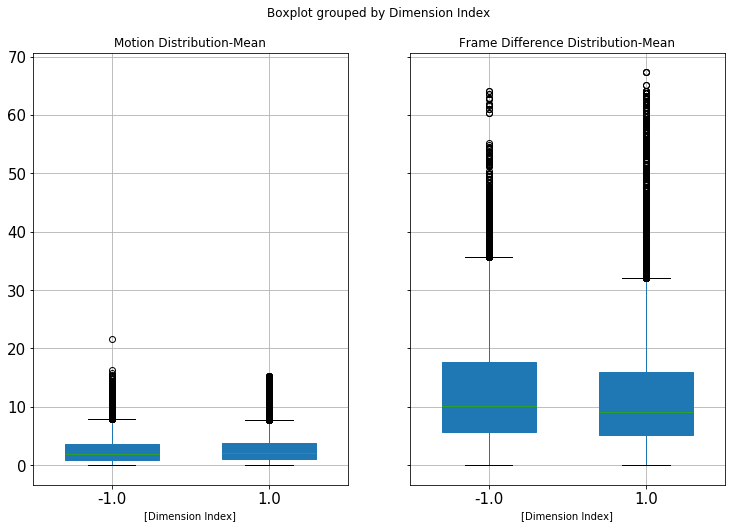

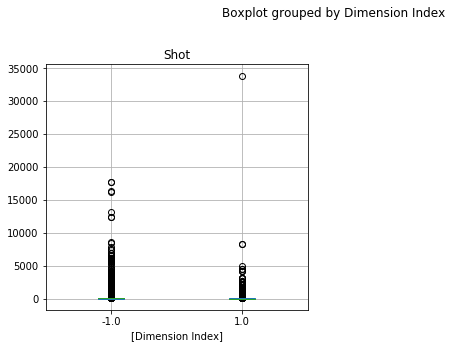

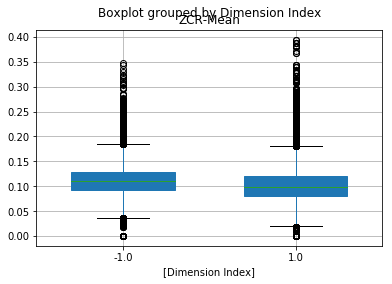

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

%matplotlib inline
#df_concat.boxplot('Shot', 'Dimension Index')

df4 = df_concat[['Dimension Index', 'Shot', 'Motion Distribution-Mean' , 'Frame Difference Distribution-Mean', 'Short time energy-Mean', 'ZCR-Mean', 'Spectral Centroid-Mean']] 

df4.boxplot(column=['Motion Distribution-Mean', 'Frame Difference Distribution-Mean'], by=['Dimension Index'], widths = 0.6, patch_artist = True, fontsize=15, rot=0, grid=True, figsize=(12,8), layout=None)
df4.boxplot(column=['Shot'], by=['Dimension Index'], widths = 0.2, patch_artist = True, fontsize=10, rot=0, grid=True, layout=(2, 2), figsize=(10,10), whis=[5,50])
df4.boxplot(column=['ZCR-Mean'], by=['Dimension Index'], widths = 0.6, patch_artist = True, ax=None, fontsize=None, rot=0, grid=True, figsize=None);

## Step 9c: Box plots

C:\Users\letic\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


TypeError: 'numpy.ndarray' object is not callable

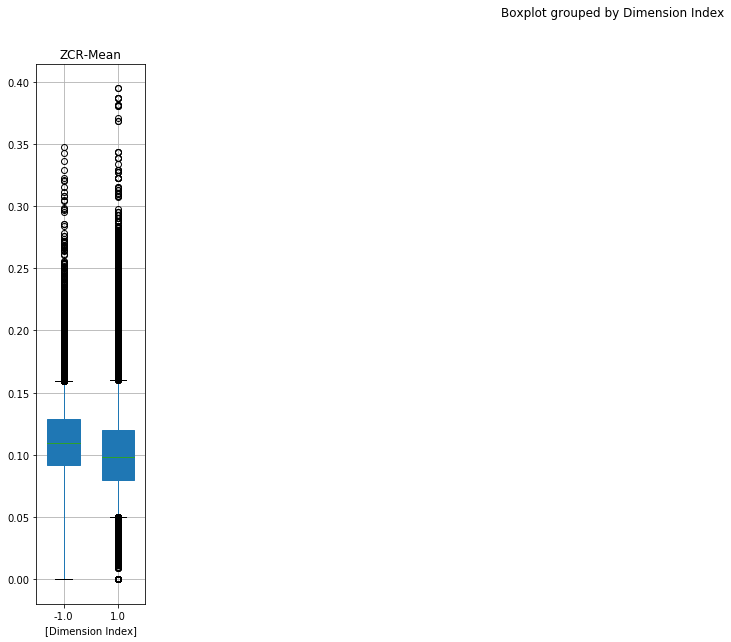

In [44]:
#Need to change scale and play with parameters
# example found at https://stackoverflow.com/questions/40892300/set-y-axis-scale-for-pandas-dataframe-boxplot-3-deviations

df4.boxplot(column=['ZCR-Mean'], by=['Dimension Index'], widths = 0.6, patch_artist = True, ax=None, fontsize=None, rot=0, grid=True, layout=(1,9), figsize=(20,10), whis=[5,95], return_type='axes')

for ax in axes.values():
    ax.set_ylim(-2.5, 2.5)

plt.show()

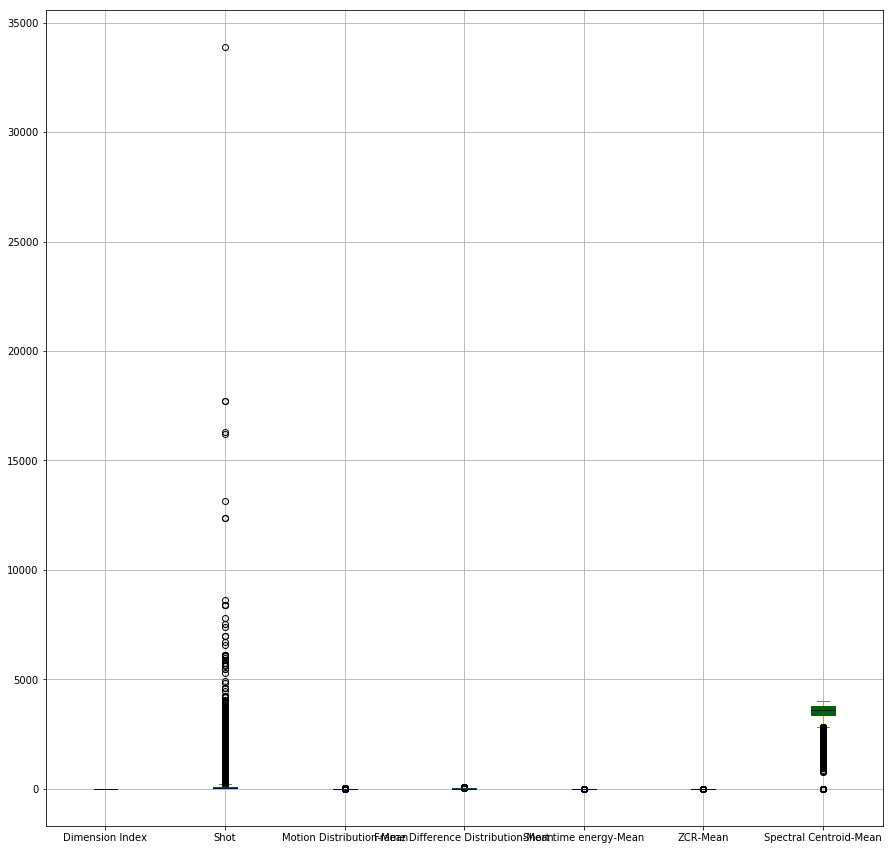

In [22]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
df4.plot.box(color=props, widths = 0.2, patch_artist = True, fontsize=10, rot=0, grid=True, figsize=(15,15), layout=None)

NameError: name 'data' is not defined

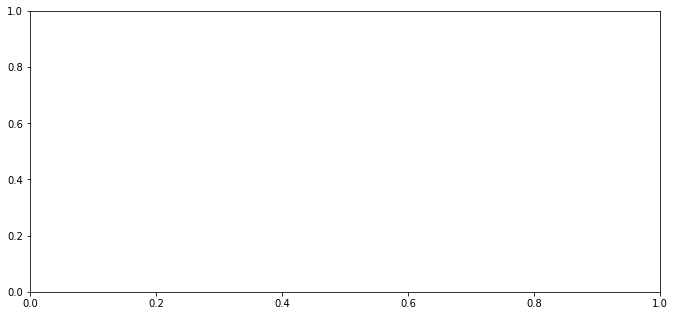

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

numDists = 5

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
            backgroundcolor=boxColors[0], color='black', weight='roman',
            size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
            backgroundcolor=boxColors[1],
            color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')

plt.show()

As show in the output above, there are now 119 entries out of the 4,126 and 129,685 rows.

## Step 10: Seperate Commercial from Non-Commercial

At this point, the concatenated dataframe has both commercial shots (+1) and non-commercial shots (-1) in the Dimension Index (the Dependent Variable). The following code separate these two classes of data into two dataframes.

Runtime Expectation: It takes about ? to run the following cell.

In [ ]:
# Drop the first column, the Dimension Index, since the two dataframes are either commercial (+1) or non-commercial (-1)

df_commercial = df_concat.loc[df_concat["Dimension Index"] == 1]
df_commercial = df_commercial.drop(["Dimension Index"], axis=1)  # Drop the first column, the Dimension Index, 

df_commercial.head()

## 10B BoxPlots

In [ ]:
#TODO Add more plots!!!!!

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
df1 = df_commercial['Shot']
plt.boxplot(df1)
plt.show()

In [ ]:
#never completes execution
df2 = df_commercial[['Shot', 'Motion Distribution-Mean' , 'Motion Distribution-Variance']]
plt.boxplot(df2, widths = 0.6, patch_artist = True)
plt.show()



## 10c boxplot


### <span style="color:red">need df1 one to have more columns such as df2 but it will not work with df2.</span>


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

numDists = 5

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(df1, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(df1[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
            backgroundcolor=boxColors[0], color='black', weight='roman',
            size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
            backgroundcolor=boxColors[1],
            color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')

plt.show()

In [ ]:
df_non_commercial = df_concat.loc[df_concat['Dimension Index'] == -1]
df_non_commercial = df_non_commercial.drop(['Dimension Index'], axis=1)  # Drop the first column, the Dimension Index, 

#df_non_commercial = df_non_commercial.reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None)
df_non_commercial = df_non_commercial.reset_index(drop=True) #reindex rows

df_non_commercial.head()

## Step 11: Seperate Dataframe into No Bins vs. Bins

### Separate Commercial (No Bins vs. Bins)

In [ ]:
cols = list(df_commercial)

bins1 = cols[17:57]
bins2 = cols[58:89]
bins3 = cols[90:120]

In [ ]:
df_commercial_no_bins = df_commercial.drop(bins1)
df_commercial_no_bins = df_commercial_no_bins.drop(bins1)   # Delete more columns from this dataset

df_commercial_no_bins.head()

In [ ]:
df_commercial_bins = df_commercial.drop(bins2)
df_commercial_bins = df_commercial_bins.drop(bins2)   # Delete more columns from this dataset

df_commercial_bins.head()

In [ ]:
df_commercial_bins = df_commercial.drop(bins3)
df_commercial_bins = df_commercial_bins.drop(bins3)   # Delete more columns from this dataset

df_commercial_bins.head()

## Step 12: Summary Statistics

### Step 12a: Summary of the Concatenated Dataset

In [ ]:
df_concat.describe()

### Step 12b: Summary of the Concatenated Dataset (Commercial)

In [ ]:
df_commercial.describe()

### Step 12c: Summary of the Concatenated Dataset (Non-commercial)

In [ ]:
df_non_commercial.describe()

### Step 12d: Observations about these Statistics

The ratio between commercial and noncommercial data is about 64% to 36%.

### <span style="color:red"> Explain why the statistics run are meaningful: </span>
> <span style="color:red"> These statistics are meaningful because it demonstrates that the mean Shot Length is what was expected. Shot length for commercial was only 63 while commercial was 180. This demonstrates what we know is that commercials generally have a much shorter shot length and that can be a string indicator to use during classification. </span>

> <span style="color:red"> Also, it is interesting that the ZCR-mean between the commercial and non-commercial sets was so similar. As a reminder, the Zero Crossing Rate (ZCR) is the rate of sign-changes along a signal. This is used in both speech recognition and music information retrieval and it is a feature used to classify sounds. This infers that the speech and music in commercials is very similar to the non-commercials show in this dataset. </span>

### Visualizing the Data 

## Step 13: Plots 

## Step 13a: Plots for the Attributes

The code below creates a plot for each of the non-binned attributes (columns 0 - 18d). 

### Note: This takes 5-10 minutes to plot all 18 columns. Patience is a virtue...

In [ ]:
%%time

import seaborn as sns

for i in range(0,19):
    sns.pairplot(df_concat[[cols[i], cols[i+1], cols[i+2], cols[i+4], cols[i+6], cols[i+8], cols[i+10]]])


## Step 13b: Hexbin Plots for the Attributes


### The Hex bin plots below compare the relationship between the different news sources. The charts visualize  the linear relationship that all of the news networks have with the means.  They will also helps identify outliers.

In [ ]:
%%time

%matplotlib inline

df_bbc.plot('Spectral Centroid-Mean', 'Spectral Roll off-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'BBC')
df_cnn.plot('Spectral Centroid-Mean', 'Spectral Roll off-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'CNN')
df_cnnibn.plot('Spectral Centroid-Mean', 'Spectral Roll off-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'CNNIBN')
df_ndtv.plot('Spectral Centroid-Mean', 'Spectral Roll off-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'NDTV')
df_timesnow.plot('Spectral Centroid-Mean', 'Spectral Roll off-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'TIMESNOW')

### This chart is a merged dataset of all 5 news sourcess, overall the trend shows a positive linear relationship.

In [ ]:
df_concat.plot('Spectral Centroid-Mean', 'Spectral Roll off-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'All Five Networks')

### The plots below compare multible different attributes in the Commercial and Non-Commercial datasets. This shows a true distinction between the two classes in the and will help demenstrate if it is possible to distinguish between commercial and non-commercial with the data at hand.

In [ ]:
%%time

%matplotlib inline

df_commercial.plot('Shot', 'Motion Distribution-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Commercial Shot Length')
df_non_commercial.plot('Shot', 'Motion Distribution-Mean', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Non-Commercial Shot Length')

### The Shot Length of the Commercial and Non-Commercial seams to be close in time. This is consistant with modern tv shows and film making where typical shot lengths last for only a few seconds.

In [ ]:
df_non_commercial.plot('Motion Distribution-Bin 1', 'Attribute 58 should be Bin 40', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Non-Commercial Motion Distribution')
df_commercial.plot('Motion Distribution-Bin 1', 'Attribute 58 should be Bin 40', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Commercial Motion Distribution')

### From the hexbin plots below the non-commercial and commercial difference distribution are simular with the non-commerical having a distinct grouping at zero. Further analysis is needed to discover the meaning of this feature in the data which be outliers.

In [ ]:
df_non_commercial.plot('Frame Difference Distribution-Bin 1', 'Attribute 91 should be Bin 32', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Non-Commercial Frame Difference Distribution')
df_commercial.plot('Frame Difference Distribution-Bin 1', 'Attribute 91 should be Bin 32', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Commercial Frame Difference Distribution')

### The comercial and non-commercial  ZCR (Zero Crossing Rate), the rate of sign-changes along a signal with the non-commerical having a distinct grouing at zero. Further analysis is needed to discover the meanign of this feature in the data.

In [ ]:
df_non_commercial.plot('ZCR-Mean', 'ZCR-Variance', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Non-Commercial ZCR')
df_commercial.plot('ZCR-Mean', 'ZCR-Variance', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Commercial ZCR')


### The hexbin plots from the Commercial and Non-Commercial plots below  demenstrate a simular positive linear relationship with the non-commerical having the more distinct linear relationship. 

In [ ]:
df_non_commercial.plot('Spectral Flux-Mean', 'Spectral Flux-Variance', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Non-Commercial Spectral Flux')
df_commercial.plot('Spectral Flux-Mean', 'Spectral Flux-Variance', kind = 'hexbin', gridsize = 30, sharex = False, title = 'Attribute: Commercial Spectral Flux')